In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [50]:
df = pd.read_csv('NIFTY 50_Data_Nov3_95_Mar9_2020.csv')

In [51]:
df.head()

,Date,Open,High,Low,Close
0,06 Mar 2020,10942.65,11035.10,10827.40,10989.45
1,05 Mar 2020,11306.05,11389.50,11244.60,11269.00
2,04 Mar 2020,11351.35,11356.60,11082.15,11251.00
3,03 Mar 2020,11217.55,11342.25,11152.55,11303.30
4,02 Mar 2020,11387.35,11433.00,11036.25,11132.75


In [52]:
df.describe()

,Open,High,Low,Close
count,6059.000000,6059.000000,6059.000000,6060.000000
mean,4479.821337,4509.931027,4444.381845,4476.958683
std,3358.979552,3369.696916,3340.957473,3355.215287
min,786.370000,805.820000,775.430000,788.150000
25%,1216.000000,1231.650000,1202.700000,1215.725000
50%,4092.050000,4150.450000,4058.350000,4091.200000
75%,6262.100000,6298.300000,6222.100000,6262.925000
max,12430.500000,12430.500000,12321.400000,12362.300000


In [55]:
df.drop(5811,axis=0,inplace=True)

In [56]:
df.describe()

,Open,High,Low,Close
count,6059.000000,6059.000000,6059.000000,6059.000000
mean,4479.821337,4509.931027,4444.381845,4477.544247
std,3358.979552,3369.696916,3340.957473,3355.182511
min,786.370000,805.820000,775.430000,788.150000
25%,1216.000000,1231.650000,1202.700000,1216.050000
50%,4092.050000,4150.450000,4058.350000,4092.250000
75%,6262.100000,6298.300000,6222.100000,6264.200000
max,12430.500000,12430.500000,12321.400000,12362.300000


In [57]:
def t_score(n1,n2,m1,m2,s1,s2):
    num = m1 - m2
    a = s1**2 / n1
    b = s2**2 / n2
    den = (a+b)**.5
    dof = n1 + n2 - 2
    t = num/den
    stat = stats.t.cdf(t,df=dof)
    return t

def t_test_2_mean(df,column,target):
    Yi = list(df[column].value_counts().index)
    Ni = list(df[column].value_counts())
    
    n1 = Ni[0]
    n2 = Ni[1]
    
    y1 = Yi[0]
    y2 = Yi[1]

    m1 = df.groupby(column).mean()[target][y1]
    m2 = df.groupby(column).mean()[target][y2]

    s1 = df.groupby(column).std()[target][y1]
    s2 = df.groupby(column).std()[target][y2]
    
    return t_score(n1,n2,m1,m2,s1,s2)
    
def chisquare_total_mean(df,column,target):
    a = np.array(df.groupby(column).mean()[target])
    sa = np.array(df.groupby(column).std()[target])
    e = np.mean(a)*np.ones(len(df[column].value_counts()))
    return stats.chisquare(a,e)   

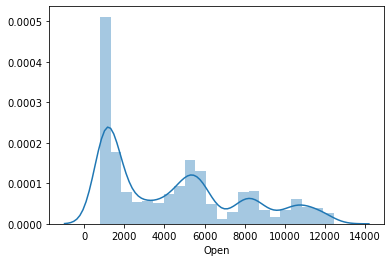

In [58]:
sns.distplot(df['Open'])

In [59]:
df.head()

,Date,Open,High,Low,Close
0,06 Mar 2020,10942.65,11035.10,10827.40,10989.45
1,05 Mar 2020,11306.05,11389.50,11244.60,11269.00
2,04 Mar 2020,11351.35,11356.60,11082.15,11251.00
3,03 Mar 2020,11217.55,11342.25,11152.55,11303.30
4,02 Mar 2020,11387.35,11433.00,11036.25,11132.75


In [79]:
def cor(df,col,t):
    n = len(df)
    df1 = list(df[col][t:])
    df2 = list(df[col][:n-t])
    return pearsonr(df1,df2)
    

In [80]:
import scipy
from scipy.stats.stats import pearsonr

In [81]:
cor(df,'Open',2)

(0.9996584338297239, 0.0)

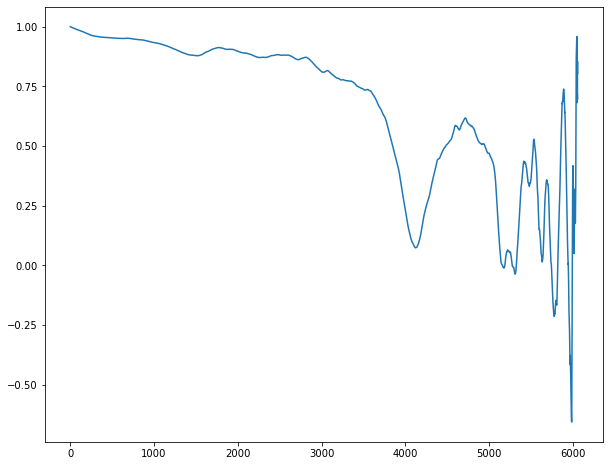

In [110]:
C = []
for i in range(1,len(df)-2):
    cn,cnn = cor(df,'Open',i)
    C.append(cn)
plt.figure(figsize=(10,8))
plt.plot(C)


In [127]:
C[5982:5988]

[-0.6448637083793518,
 -0.6547055812743985,
 -0.6557255642530055,
 -0.6213891104050759,
 -0.566877859881408,
 -0.4884806457009052]

In [91]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [92]:
df['Date'] = pd.to_datetime(df['Date'])

In [93]:
df.describe()

,Open,High,Low,Close
count,6059.000000,6059.000000,6059.000000,6059.000000
mean,4479.821337,4509.931027,4444.381845,4477.544247
std,3358.979552,3369.696916,3340.957473,3355.182511
min,786.370000,805.820000,775.430000,788.150000
25%,1216.000000,1231.650000,1202.700000,1216.050000
50%,4092.050000,4150.450000,4058.350000,4092.250000
75%,6262.100000,6298.300000,6222.100000,6264.200000
max,12430.500000,12430.500000,12321.400000,12362.300000


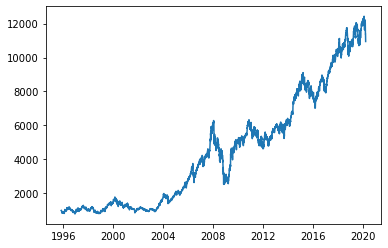

In [97]:
plt.plot(df['Date'],df['Open'])

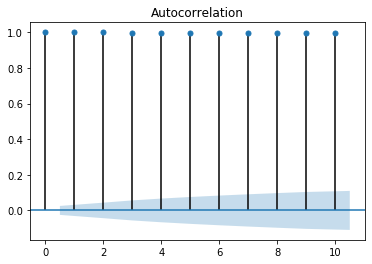

<Figure size 720x576 with 0 Axes>

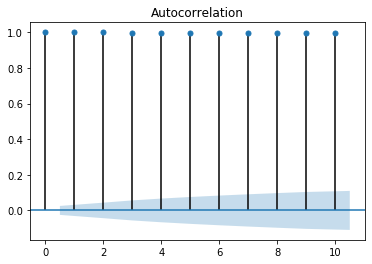

In [100]:
plt.figure(figsize=(10,8))
sm.graphics.tsa.plot_acf(df['Open'].values.squeeze(), lags=10)

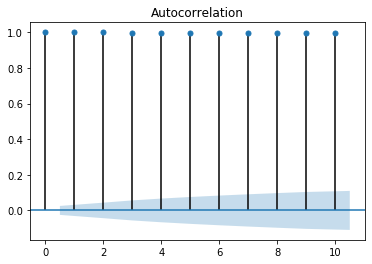

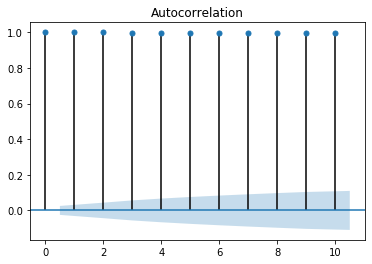

In [104]:
plot_acf(df['Low'],lags = 10)